### 1. Data Cleaning based on EDA

In [1]:
import pandas as pd

In [2]:
print("")

In [3]:
df = pd.read_csv(r"USA_visadataset.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


##### 1.1 `case_id` column can be dropped as it is an ID.
#### 1.2 `requires_job_training` column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.

In [5]:
df_1 = df.drop(columns=["case_id","requires_job_training"])

In [6]:
df_1.head()

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,1082,2005,South,149907.3900,Year,Y,Certified


#### 1.3  `continent` columns has few unique values with very less count, which can be made as **others**

In [7]:
df_1.continent.value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [8]:
def make_others_continent(x):
    if x not in ["Asia","Europe","North America"]:
        return "others"
    return x

In [9]:
df_1["continent"] = df_1["continent"].apply(make_others_continent)

In [10]:
df_1.continent.value_counts()

continent
Asia             16861
Europe            3732
North America     3292
others            1595
Name: count, dtype: int64

#### 1.4 `no_of_employees`, `prevailing_wage` columns have outllier which should be handled.

In [11]:
df_1["no_of_employees"].describe() ,  df_1["prevailing_wage"].describe()

(count     25480.000000
 mean       5667.043210
 std       22877.928848
 min         -26.000000
 25%        1022.000000
 50%        2109.000000
 75%        3504.000000
 max      602069.000000
 Name: no_of_employees, dtype: float64,
 count     25480.000000
 mean      74455.814592
 std       52815.942327
 min           2.136700
 25%       34015.480000
 50%       70308.210000
 75%      107735.512500
 max      319210.270000
 Name: prevailing_wage, dtype: float64)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

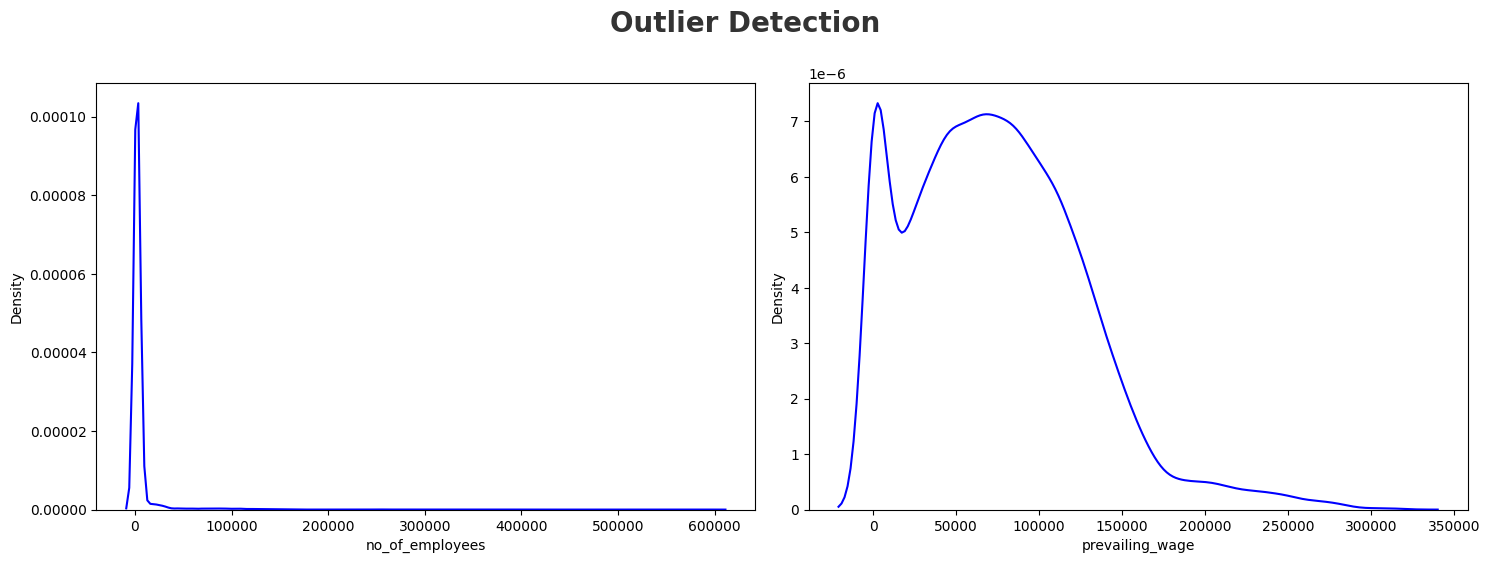

In [13]:
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Detection', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = ['no_of_employees', 'prevailing_wage']
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_1[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [14]:
median_75_no_of_employees = 7500.210000
df_2 =  df_1[df_1["no_of_employees"]<7500.210000]#mean_no_of_employees +0*sd_no_of_employees]
mean_prevailing_wage = 74455.814592
sd_prevailing_wage = 52815.942327
df_2 = df_2[df_2["prevailing_wage"]<mean_prevailing_wage+2*sd_prevailing_wage]

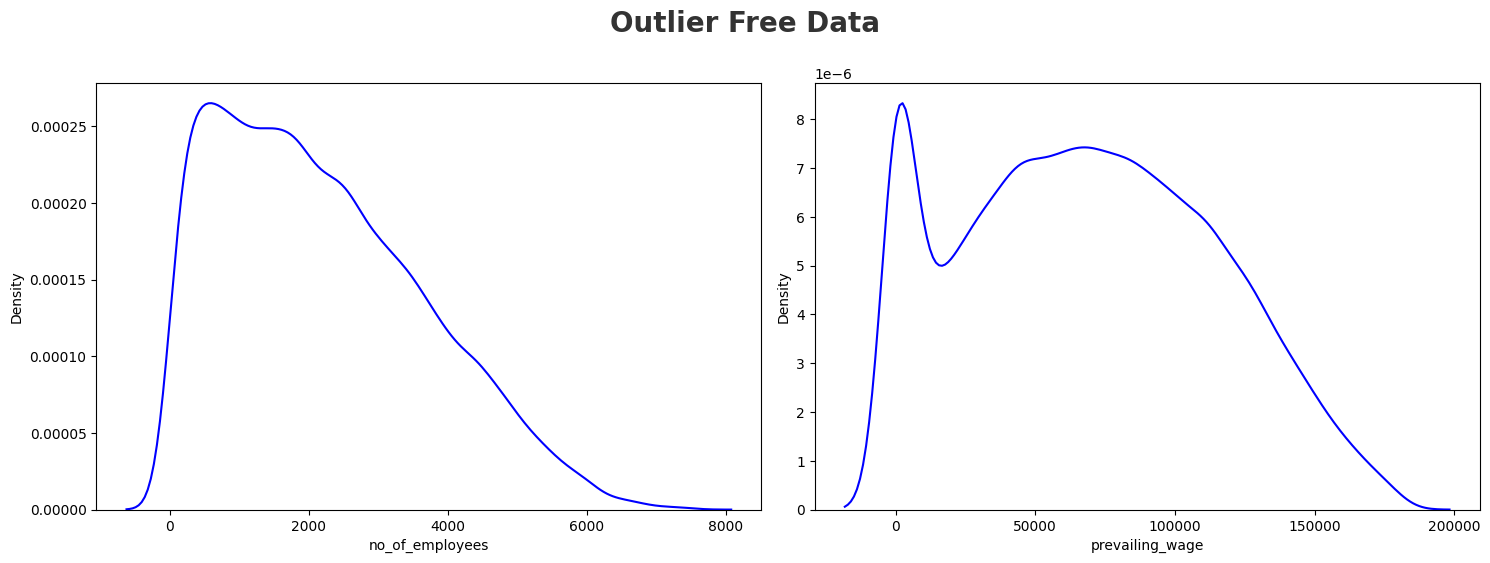

In [15]:
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Free Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = ['no_of_employees', 'prevailing_wage']
for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_2[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

##### 1.5 Target column `case_status` is imbalanced can be handled before model building.
* will do shuffle at model traning

In [16]:
## 2 Feature Engineering

In [17]:
df_2

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,2412,2002,Northeast,83425.65,Year,Y,Certified
3,Asia,Bachelor's,N,98,1897,West,83434.03,Year,Y,Denied
4,others,Master's,Y,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,2339,2012,South,78252.14,Year,Y,Certified
6,Asia,Bachelor's,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...
25474,others,Doctorate,N,2594,1979,Northeast,51104.78,Year,Y,Certified
25475,Asia,Bachelor's,Y,2601,2008,South,77092.57,Year,Y,Certified
25477,Asia,Master's,Y,1121,1910,South,146298.85,Year,N,Certified
25478,Asia,Master's,Y,1918,1887,West,86154.77,Year,Y,Certified


In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23088 entries, 1 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              23088 non-null  object 
 1   education_of_employee  23088 non-null  object 
 2   has_job_experience     23088 non-null  object 
 3   no_of_employees        23088 non-null  int64  
 4   yr_of_estab            23088 non-null  int64  
 5   region_of_employment   23088 non-null  object 
 6   prevailing_wage        23088 non-null  float64
 7   unit_of_wage           23088 non-null  object 
 8   full_time_position     23088 non-null  object 
 9   case_status            23088 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [19]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [20]:
df_2['company_age'] = current_year-df_2['yr_of_estab']

In [21]:
df_2

,continent,education_of_employee,has_job_experience,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
1,Asia,Master's,Y,2412,2002,Northeast,83425.65,Year,Y,Certified,22
3,Asia,Bachelor's,N,98,1897,West,83434.03,Year,Y,Denied,127
4,others,Master's,Y,1082,2005,South,149907.39,Year,Y,Certified,19
5,Asia,Master's,Y,2339,2012,South,78252.14,Year,Y,Certified,12
6,Asia,Bachelor's,N,4985,1994,South,53635.39,Year,Y,Certified,30
...,...,...,...,...,...,...,...,...,...,...,...
25474,others,Doctorate,N,2594,1979,Northeast,51104.78,Year,Y,Certified,45
25475,Asia,Bachelor's,Y,2601,2008,South,77092.57,Year,Y,Certified,16
25477,Asia,Master's,Y,1121,1910,South,146298.85,Year,N,Certified,114
25478,Asia,Master's,Y,1918,1887,West,86154.77,Year,Y,Certified,137


In [22]:
df_2.drop('yr_of_estab', inplace=True, axis=1)

#### 2.1 Doing Label encoding on Catagorical values

In [23]:
# Changing 2 variable catagory first 
def no_yes(x):
    if x=="Y" or x=="Certified" :
        return 1
    return 0

In [24]:
df_3 = df_2.copy()

In [25]:
df_3["has_job_experience"] = df_3["has_job_experience"].apply(no_yes)
df_3["full_time_position"] = df_3["full_time_position"].apply(no_yes)
df_3["case_status"] = df_3["case_status"].apply(no_yes)

In [26]:
df_3

,continent,education_of_employee,has_job_experience,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
1,Asia,Master's,1,2412,Northeast,83425.65,Year,1,1,22
3,Asia,Bachelor's,0,98,West,83434.03,Year,1,0,127
4,others,Master's,1,1082,South,149907.39,Year,1,1,19
5,Asia,Master's,1,2339,South,78252.14,Year,1,1,12
6,Asia,Bachelor's,0,4985,South,53635.39,Year,1,1,30
...,...,...,...,...,...,...,...,...,...,...
25474,others,Doctorate,0,2594,Northeast,51104.78,Year,1,1,45
25475,Asia,Bachelor's,1,2601,South,77092.57,Year,1,1,16
25477,Asia,Master's,1,1121,South,146298.85,Year,0,1,114
25478,Asia,Master's,1,1918,West,86154.77,Year,1,1,137


In [27]:
df_3 = df_3.reset_index().drop(columns = ["index"])

In [28]:
from sklearn.preprocessing import OneHotEncoder
coder = OneHotEncoder()

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23088 entries, 0 to 23087
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              23088 non-null  object 
 1   education_of_employee  23088 non-null  object 
 2   has_job_experience     23088 non-null  int64  
 3   no_of_employees        23088 non-null  int64  
 4   region_of_employment   23088 non-null  object 
 5   prevailing_wage        23088 non-null  float64
 6   unit_of_wage           23088 non-null  object 
 7   full_time_position     23088 non-null  int64  
 8   case_status            23088 non-null  int64  
 9   company_age            23088 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.8+ MB


['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']

['has_job_experience',
 'no_of_employees',
 'prevailing_wage',
 'full_time_position',
 'case_status',
 'company_age']

In [30]:
categorical_features = [feature for feature in df_3.columns if df_3[feature].dtype == 'O']
numeric_features = [feature for feature in df_3.columns if df_3[feature].dtype != "O"]
# categorical_features,numeric_features

In [31]:
encoded_data = coder.fit_transform(df_3[categorical_features])
# encoded_data = pd.DataFrame(encoded_data.toarray())
len(encoded_data.toarray())

23088

In [32]:
df_4 = df_3.join(pd.DataFrame(encoded_data.toarray()))
df_4

,continent,education_of_employee,has_job_experience,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age,...,7,8,9,10,11,12,13,14,15,16
0,Asia,Master's,1,2412,Northeast,83425.65,Year,1,1,22,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Asia,Bachelor's,0,98,West,83434.03,Year,1,0,127,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,others,Master's,1,1082,South,149907.39,Year,1,1,19,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Asia,Master's,1,2339,South,78252.14,Year,1,1,12,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Asia,Bachelor's,0,4985,South,53635.39,Year,1,1,30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23083,others,Doctorate,0,2594,Northeast,51104.78,Year,1,1,45,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23084,Asia,Bachelor's,1,2601,South,77092.57,Year,1,1,16,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23085,Asia,Master's,1,1121,South,146298.85,Year,0,1,114,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23086,Asia,Master's,1,1918,West,86154.77,Year,1,1,137,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
print("Basically Classes are : ")
coder.categories_

Basically Classes are : 


[array(['Asia', 'Europe', 'North America', 'others'], dtype=object),
 array(["Bachelor's", 'Doctorate', 'High School', "Master's"], dtype=object),
 array(['Island', 'Midwest', 'Northeast', 'South', 'West'], dtype=object),
 array(['Hour', 'Month', 'Week', 'Year'], dtype=object)]

In [34]:
columnsname = {0:'Asia',1: 'Europe',2: 'North America',3:"others", 4:"Bachelor's",5: 'Doctorate',6:"High School",7:"Master's",
              8:'Island', 9:'Midwest',10: 'Northeast',11: 'South', 12:'West',13:'Hour', 14:'Month',15: 'Week', 16:'Year' }
df_6 = df_4.drop(columns=["education_of_employee","continent","region_of_employment","unit_of_wage"])
df_6 =df_6.rename(columns=columnsname)

In [35]:
df_6.head()

,has_job_experience,no_of_employees,prevailing_wage,full_time_position,case_status,company_age,Asia,Europe,North America,others,...,Master's,Island,Midwest,Northeast,South,West,Hour,Month,Week,Year
0,1,2412,83425.65,1,1,22,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,98,83434.03,1,0,127,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1082,149907.39,1,1,19,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,2339,78252.14,1,1,12,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,4985,53635.39,1,1,30,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Split X and Y
- Split Dataframe to X and y
- Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “ProdTaken” column.

In [75]:
df_6.columns

Index(['has_job_experience', 'no_of_employees', 'prevailing_wage',
       'full_time_position', 'case_status', 'company_age', 'Asia', 'Europe',
       'North America', 'others', 'Bachelor's', 'Doctorate', 'High School',
       'Master's', 'Island', 'Midwest', 'Northeast', 'South', 'West', 'Hour',
       'Month', 'Week', 'Year'],
      dtype='object')

In [80]:
X  = df_6.drop(columns=["case_status"])
y = df_6["case_status"]

In [81]:
X

,has_job_experience,no_of_employees,prevailing_wage,full_time_position,company_age,Asia,Europe,North America,others,Bachelor's,...,Master's,Island,Midwest,Northeast,South,West,Hour,Month,Week,Year
0,1,2412,83425.65,1,22,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,98,83434.03,1,127,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1082,149907.39,1,19,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,2339,78252.14,1,12,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,4985,53635.39,1,30,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23083,0,2594,51104.78,1,45,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23084,1,2601,77092.57,1,16,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23085,1,1121,146298.85,0,114,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23086,1,1918,86154.77,1,137,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Feature Transformation

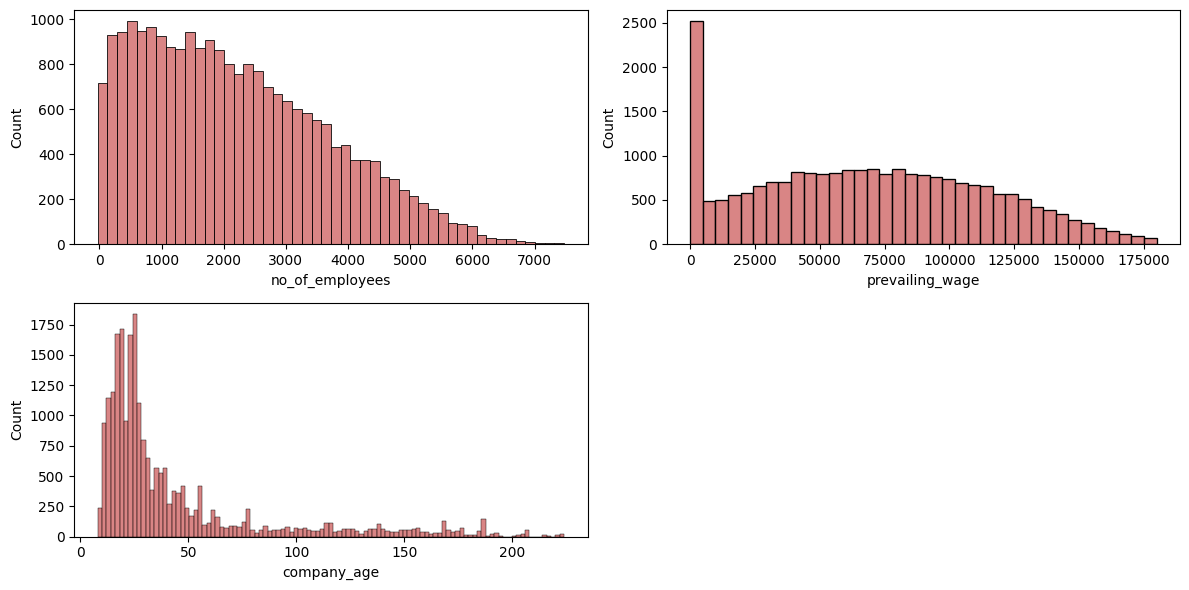

In [37]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [38]:
X[['no_of_employees','prevailing_wage','company_age']].skew(axis=0, skipna=True)

no_of_employees    0.589112
prevailing_wage    0.178977
company_age        2.042325
dtype: float64

- Positiviely Skewed : company_age, no_of_employees

### Positiviely Skewed : company_age, no_of_employees

In [39]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [82]:
num_features = ['has_job_experience',
 'no_of_employees',
 'prevailing_wage',
 'full_time_position',
 'company_age',
 'Asia',
 'Europe',
 'North America',
 'others',
 "Bachelor's",
 'Doctorate',
 'High School',
 "Master's",
 'Island',
 'Midwest',
 'Northeast',
 'South',
 'West',
 'Hour',
 'Month',
 'Week',
 'Year']
or_columns = ['has_job_experience','full_time_position']
transform_columns= ['no_of_employees','company_age']

['has_job_experience',
 'no_of_employees',
 'prevailing_wage',
 'full_time_position',
 'company_age',
 'Asia',
 'Europe',
 'North America',
 'others',
 "Bachelor's",
 'Doctorate',
 'High School',
 "Master's",
 'Island',
 'Midwest',
 'Northeast',
 'South',
 'West',
 'Hour',
 'Month',
 'Week',
 'Year']

In [40]:
X

,has_job_experience,no_of_employees,prevailing_wage,full_time_position,company_age,Asia,Europe,North America,others,Bachelor's,...,Master's,Island,Midwest,Northeast,South,West,Hour,Month,Week,Year
0,1,2412,83425.65,1,22,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,98,83434.03,1,127,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1082,149907.39,1,19,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,2339,78252.14,1,12,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,4985,53635.39,1,30,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23083,0,2594,51104.78,1,45,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23084,1,2601,77092.57,1,16,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23085,1,1121,146298.85,0,114,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23086,1,1918,86154.77,1,137,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','full_time_position']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

preprocessor = ColumnTransformer(
    [
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [76]:
preprocessor

ColumnTransformer(transformers=[('Ordinal_Encoder', OrdinalEncoder(),
                                 ['has_job_experience', 'full_time_position']),
                                ('Transformer',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 ['no_of_employees', 'company_age']),
                                ('StandardScaler', StandardScaler(),
                                 ['has_job_experience', 'no_of_employees',
                                  'prevailing_wage', 'full_time_position',
                                  'company_age', 'Asia', 'Europe',
                                  'North America', 'others', "Bachelor's",
                                  'Doctorate', 'High School', "Master's",
                                  'Island', 'Midwest', 'Northeast', 'South',
                                  'West', 'Hour', 'Month', 'Week', 'Year'])])

In [77]:
import pickle

In [78]:
with open('PII_model.pickle', 'wb') as picklefile:
    pickle.dump(preprocessor, picklefile)

In [79]:
X

array([[ 1.        ,  1.        ,  0.30832298, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 0.        ,  1.        , -1.67583951, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 1.        ,  1.        , -0.72681594, ..., -0.05896653,
        -0.10462632,  0.33837977],
       ...,
       [ 1.        ,  0.        , -0.69210587, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 1.        ,  1.        , -0.03792588, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 1.        ,  1.        ,  0.77609853, ..., -0.05896653,
        -0.10462632,  0.33837977]])

In [42]:
X = preprocessor.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21,stratify=y)

# Define scaling methods
scaling_methods = {
    'StandardScaler': StandardScaler()
    #, 'RobustScaler': RobustScaler()
}

models = {
    'SVM': (SVC(), {'classifier__C': [0.1, 1], 'classifier__kernel': ['linear', 'rbf']}),
    'RandomForest': (RandomForestClassifier(), {'classifier__n_estimators': [50, 100], 'classifier__max_depth': [10, 20]}),
    "AdaBoostClassifier":(AdaBoostClassifier(),{})
}

results = {}
for scaler_name, scaler in scaling_methods.items():
    for model_name, (model, param_grid) in models.items():
        pipeline = Pipeline([
            ('scaler', scaler),
            ('classifier', model)
        ])
        
        # Perform grid search cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # Store best cross-validation score
        results[(scaler_name, model_name)] = grid_search.best_score_

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Best Cross-Validation Score'])
print(results_df)

In [48]:
X_train

array([[ 1.        ,  1.        , -1.53976248, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 0.        ,  1.        ,  0.26350012, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 1.        ,  1.        ,  1.60434372, ..., -0.05896653,
        -0.10462632,  0.33837977],
       ...,
       [ 1.        ,  1.        , -0.48549944, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 1.        ,  1.        ,  0.50256897, ..., -0.05896653,
        -0.10462632,  0.33837977],
       [ 1.        ,  1.        ,  0.49893066, ..., -0.05896653,
        -0.10462632,  0.33837977]])

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
des_tree  =DecisionTreeClassifier(criterion="gini")
des_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
des_tree.score(X_test,y_test)

0.6563447379818103

In [52]:
ada_boo = AdaBoostClassifier(learning_rate=0.1)
ada_boo.fit(X_train,y_train)
ada_boo.score(X_test,y_test)

0.71654395842356

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
gra_boo = GradientBoostingClassifier(learning_rate=.12)
gra_boo.fit(X_train,y_train)
gra_boo.score(X_test,y_test)

0.7592031182330014

In [55]:
from sklearn.linear_model import LogisticRegression
log_rig = LogisticRegression(max_iter=10000)
log_rig.fit(X_train,y_train)
log_rig.score(X_test,y_test)

0.7477262884365526

In [56]:
from sklearn.ensemble import RandomForestClassifier
rad_fr = RandomForestClassifier(max_depth=15)
rad_fr.fit(X_train,y_train)
rad_fr.score(X_test,y_test)

0.750974447812906

In [57]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

26

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12109, 26), (3028, 26))

In [59]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [60]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [61]:

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

accuracy_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy, model_train_f1,model_train_precision,\
    model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred) 


    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1)) 
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    accuracy_list.append(model_test_accuracy)


    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9998
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9485
- F1 score: 0.9442
- Precision: 0.9496
- Recall: 0.9388
- Roc Auc Score: 0.9478


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9158
- F1 score: 0.9089
- Precision: 0.9131
- Recall: 0.9047
- Roc Auc Score: 0.9150


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8936
- F1 score: 0.8861
- Precision: 0.8775
- Recall: 0.8949
- Roc Auc Score: 0.8936
----------------------------------
Model performance for Test set
- Accuracy: 0.8913
- F1 score: 0.8838
- Precision: 0.8779
- Recall: 0.8898
- Roc Auc Score: 0.8912


Logistic Regression
Model performance for Training 

In [62]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
def make_Roc_curve(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title(f'{model}')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

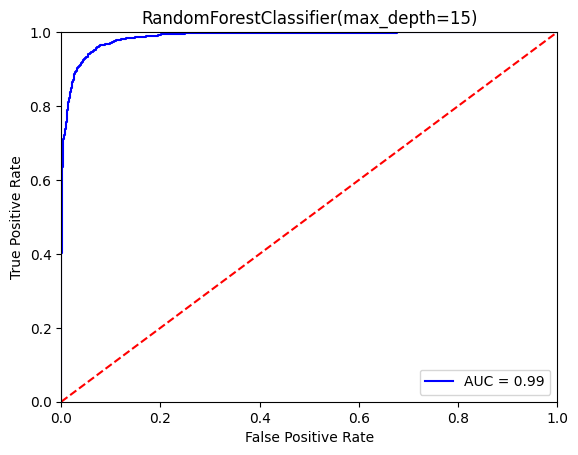

In [63]:
make_Roc_curve(rad_fr)

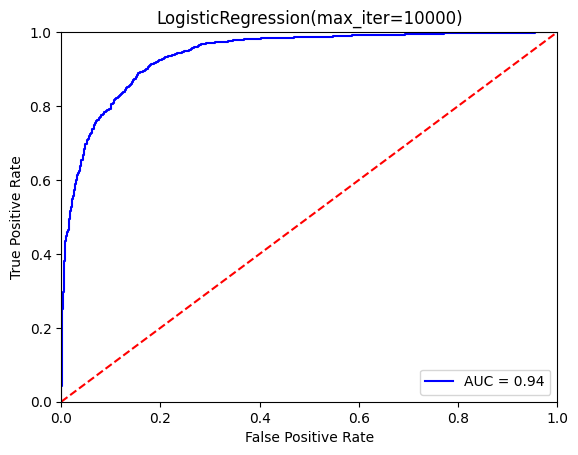

In [64]:
make_Roc_curve(log_rig)

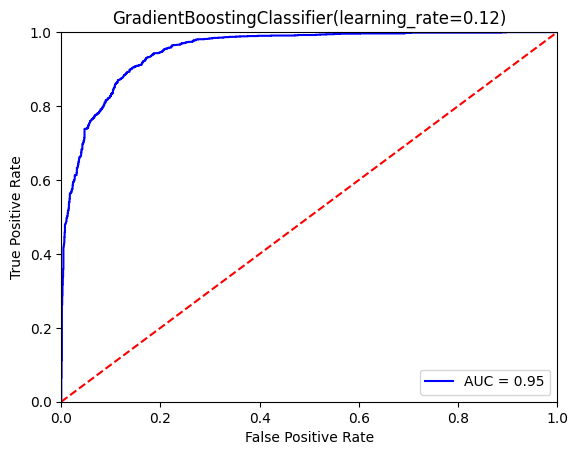

In [65]:
make_Roc_curve(gra_boo)

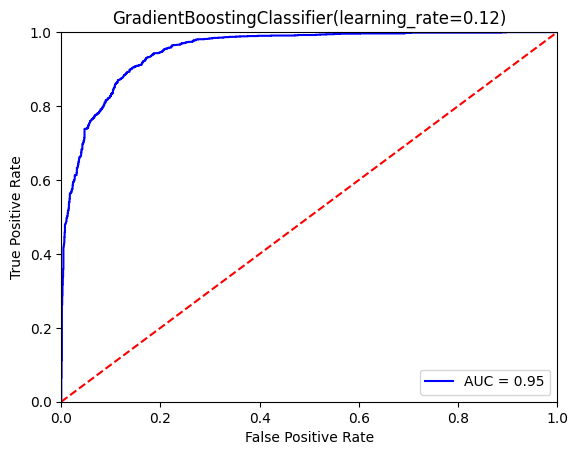

In [66]:
make_Roc_curve(gra_boo)

In [67]:
Results = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_score'])
Results.sort_values(by=["Accuracy_score"],ascending=False)

,Model Name,Accuracy_score
0,Random Forest,0.948481
4,K-Neighbors Classifier,0.935931
5,XGBClassifier,0.931638
6,CatBoosting Classifier,0.926354
1,Decision Tree,0.915786
7,Support Vector Classifier,0.891678
2,Gradient Boosting,0.891347
3,Logistic Regression,0.870872
8,AdaBoost Classifier,0.868230


In [68]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
criterion = ["gini", "entropy", "log_loss"]
# Create the random grid
rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [69]:
# from sklearn.model_selection import RandomizedSearchCV
# random = RandomizedSearchCV(estimator=RandomForestClassifier(),
#                                    param_distributions=rf_params,
#                                    n_iter=50,
#                                    cv=3,
#                                    verbose=2,
#                                    n_jobs=-1)
# random.fit(X_train, y_train)

In [70]:

best_params = random.best_params_
rf=RandomForestClassifier(**best_params, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score= evaluate_clf(y_test, y_pred)

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

NameError: name 'random' is not defined

## Best Model is Random Forest with Accuracy 95.11%

In [71]:
models_list

['Random Forest',
 'Decision Tree',
 'Gradient Boosting',
 'Logistic Regression',
 'K-Neighbors Classifier',
 'XGBClassifier',
 'CatBoosting Classifier',
 'Support Vector Classifier',
 'AdaBoost Classifier']

In [ ]:
model = list(models.values())[i]
model.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training set performance
model_train_accuracy, model_train_f1,model_train_precision,\
model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred) 


# Test set performance
model_test_accuracy,model_test_f1,model_test_precision,\
model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

print(list(models.keys())[i])
models_list.append(list(models.keys())[i])

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1)) 
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))